![hackio](https://github.com/Hack-io-df_alas/Imagenes/blob/main/01-LogosHackio/logo_celeste@4x.png?raw=true)


# Laboratorio A/B Testing No Paramétricos

**Aerolínea:** 
Alas del Mundo

**Descripción de la Aerolínea**

Alas del Mundo es una aerolínea internacional que opera una amplia red de rutas a nivel mundial. La compañía se enorgullece de ofrecer vuelos cómodos y asequibles a una variedad de destinos, atrayendo a una diversa gama de clientes.

**Objetivo del Análisis**

El objetivo de este ejercicio es determinar si existe una diferencia significativa en el número de vuelos reservados entre pasajeros con diferentes niveles educativos y si existe una diferencia significativa entre el género de sus clientes y su salario. La aerolínea desea entender mejor a sus clientes para poder personalizar sus campañas de marketing y mejorar sus estrategias de ventas.

**Set de datos**

El conjunto de datos *alas_del_mundo.csv* contiene información sobre clientes de la aerolínea Alas del Mundo. A continuación, tenemos una descripción de lo que nos podemos encontrar en el conjunto de datos:

- **Loyalty Number**: Número de registro de cada uno de los clientes.

- **Province**: Provincia de residencia del cliente.

- **City**: Ciudad de residencia del cliente.

- **Gender**: Género con el que se identifica el cliente.

- **Education**: Nivel educativo del cliente.

- **Salary**: Salario anual del cliente.

- **Loyalty Card**: Nivel que tiene el cliente dentro del programa de fidelización de la aerolínea.

- **CLV**: Valor total del cliente para la aerolínea a lo largo de toda su relación.

- **Enrollment Type**: Forma de registro del cliente a la aerolínea.

- **Enrollment Year**: Año de inscripción.

- **Enrollment Month**: Mes de inscripción. 

- **Year**: Año en el que se realizan los vuelos.

- **Month**: Mes en el que se realizan los vuelos.

- **Flights Booked**: Vuelos reservados por el cliente en un mes y año concretos.

- **Distance**: Distancia de vuelo del cliente en un mes y año concreto

- **Points Accumulated**: Puntos acumulados por el cliente en un mes y año concretos.

## Ejercicio 1:

Antes de realizar el experimento A/B y formular hipótesis, es fundamental comprender a fondo el conjunto de datos y sus características. Para lograr esto, debes llevar a cabo un análisis exploratorio detallado de los datos (EDA), con el fin de familiarizarte con ellos y entender la información disponible.



In [69]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular ciertos estadísticos
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import shapiro, levene, f_oneway, kruskal,mannwhitneyu

# Para crear combinaciones de columnas
# ------------------------------------------------------------------------------
from itertools import combinations

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los df_alasFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [40]:
# lo primero que hacemos es cargar el df que vamos a usar para esta lección
df_alas = pd.read_csv("alas_del_mundo.csv")
df_alas.head()

,Loyalty Number,Province,City,Gender,Education,Salary,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Distance,Points Accumulated
0,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,1,0,0,0.0
1,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,2,3,2823,282.0
2,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,3,0,0,0.0
3,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,4,0,0,0.0
4,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2018,10,6,3352,335.0


In [41]:
# Información general del df_alasset
print("Información del df_alas:")
print(df_alas.info())
print("\nValores nulos por columna:")
print(df_alas.isnull().sum())

Información del df_alas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Loyalty Number      405624 non-null  int64  
 1   Province            405624 non-null  object 
 2   City                405624 non-null  object 
 3   Gender              405624 non-null  object 
 4   Education           405624 non-null  object 
 5   Salary              302952 non-null  float64
 6   Loyalty Card        405624 non-null  object 
 7   CLV                 405624 non-null  float64
 8   Enrollment Type     405624 non-null  object 
 9   Enrollment Year     405624 non-null  int64  
 10  Enrollment Month    405624 non-null  int64  
 11  Year                405624 non-null  int64  
 12  Month               405624 non-null  int64  
 13  Flights Booked      405624 non-null  int64  
 14  Distance            405624 non-null  int64  
 15  Points Ac

In [42]:
# Valores unicos por columnas
df_alas.nunique()

Loyalty Number        16737
Province                 11
City                     29
Gender                    2
Education                 5
Salary                 5890
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Year                      2
Month                    12
Flights Booked           22
Distance               4746
Points Accumulated     1549
dtype: int64

In [43]:
# Imprimir los valores únicos de cada columna
for column in df_alas.columns:
    unique_values = df_alas[column].unique()
    print(f"Valores únicos en '{column}':\n{unique_values}\n")

Valores únicos en 'Loyalty Number':
[480934 549612 429460 ... 776187 906428 652627]

Valores únicos en 'Province':
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']

Valores únicos en 'City':
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']

Valores únicos en 'Gender':
['Female' 'Male']

Valores únicos en 'Education':
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']

Valores únicos en 'Salary':
[ 83236.     nan 103495. ...  76178.  91970. -57297.]

Valores únicos en 'Loyalty Card':
['Star' 'Aurora' 'Nova']

Valores únicos en 'CLV':
[ 3839.14  3839.61  3839.75 ... 44771.3  50568.26 6113

In [44]:
# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(df_alas.describe(include='all'))

Estadísticas descriptivas:
        Loyalty Number Province     City  Gender Education         Salary  \
count    405624.000000   405624   405624  405624    405624  302952.000000   
unique             NaN       11       29       2         5            NaN   
top                NaN  Ontario  Toronto  Female  Bachelor            NaN   
freq               NaN   130896    81096  203640    253752            NaN   
mean     550037.873084      NaN      NaN     NaN       NaN   79268.825953   
std      258935.286969      NaN      NaN     NaN       NaN   34992.133508   
min      100018.000000      NaN      NaN     NaN       NaN  -58486.000000   
25%      326961.000000      NaN      NaN     NaN       NaN   59262.000000   
50%      550834.000000      NaN      NaN     NaN       NaN   73479.000000   
75%      772194.000000      NaN      NaN     NaN       NaN   88612.000000   
max      999986.000000      NaN      NaN     NaN       NaN  407228.000000   

       Loyalty Card            CLV Enrollment Ty

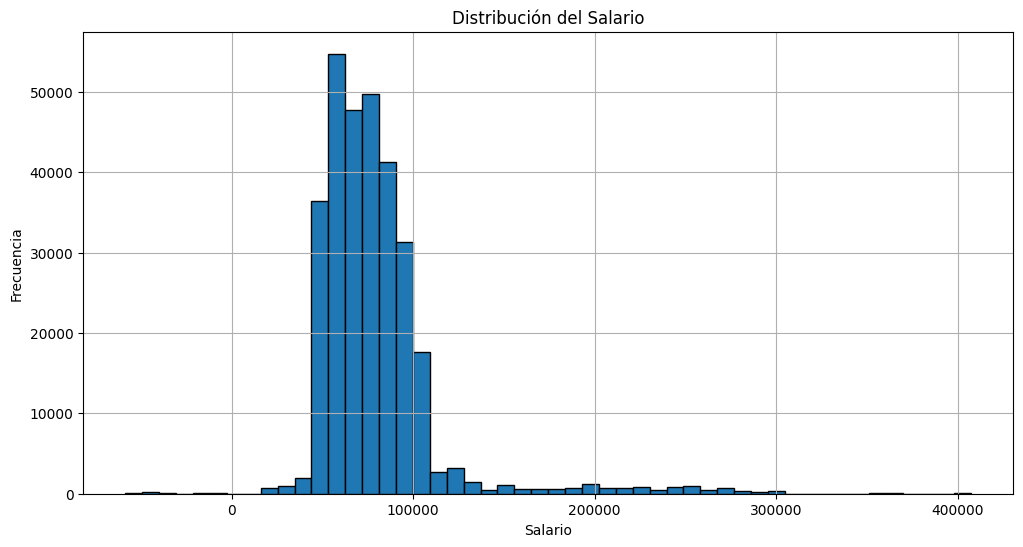

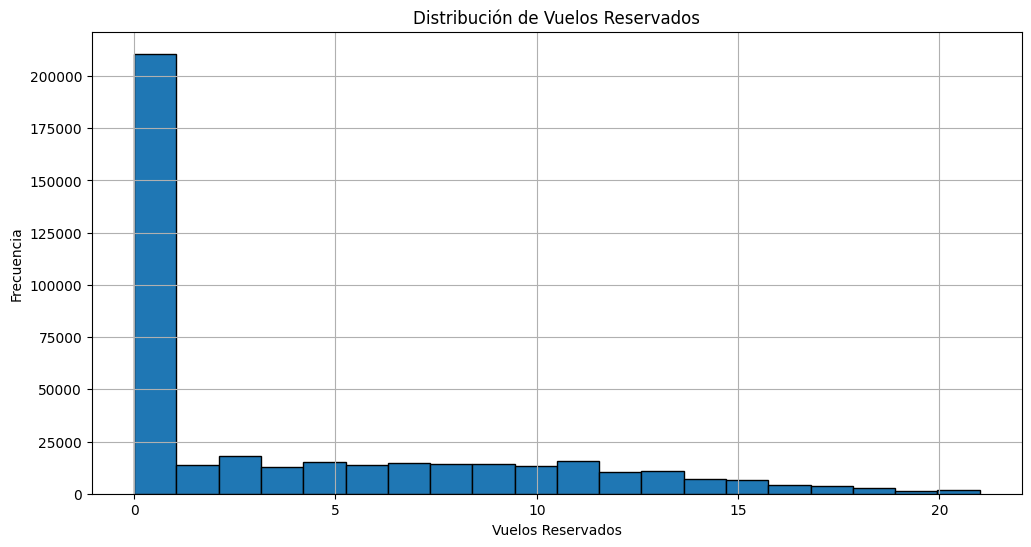

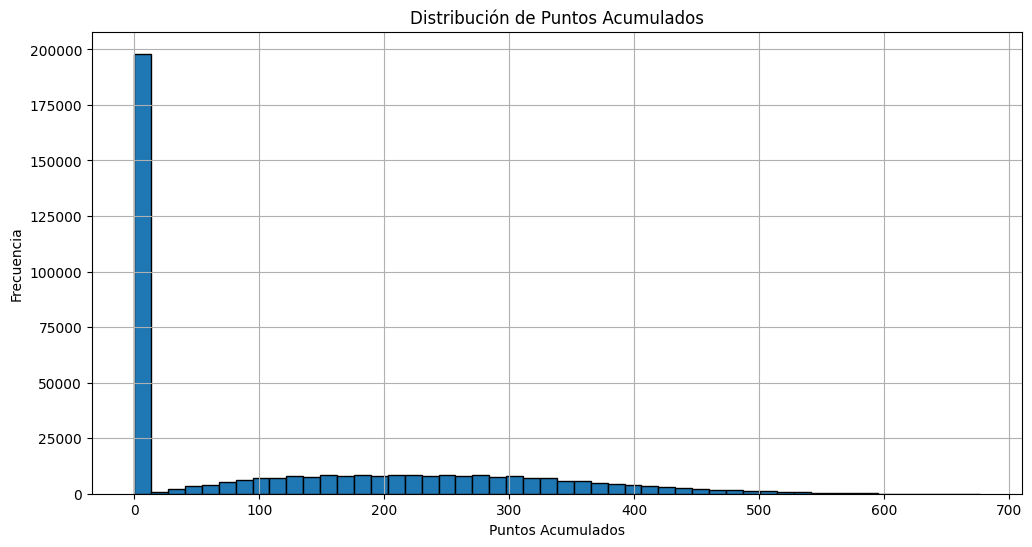

In [45]:
# Distribución de variables numéricas clave
plt.figure(figsize=(12, 6))
df_alas['Salary'].hist(bins=50, edgecolor='black')
plt.title("Distribución del Salario")
plt.xlabel("Salario")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(12, 6))
df_alas['Flights Booked'].hist(bins=20, edgecolor='black')
plt.title("Distribución de Vuelos Reservados")
plt.xlabel("Vuelos Reservados")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(12, 6))
df_alas['Points Accumulated'].hist(bins=50, edgecolor='black')
plt.title("Distribución de Puntos Acumulados")
plt.xlabel("Puntos Acumulados")
plt.ylabel("Frecuencia")
plt.show()




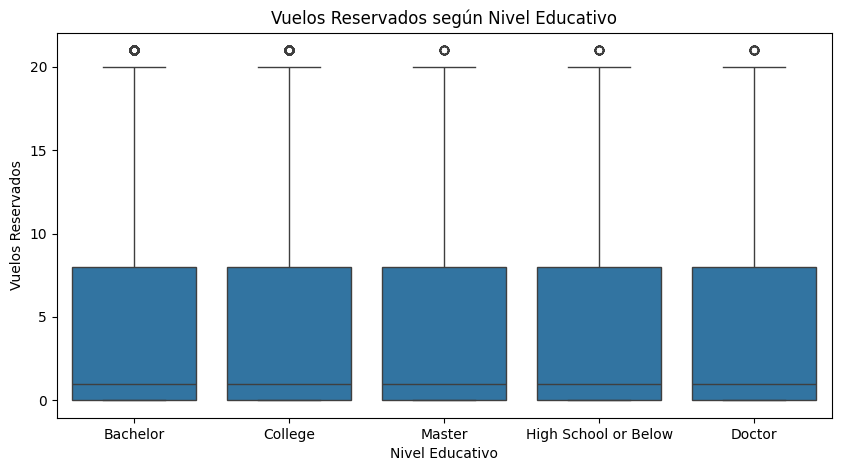

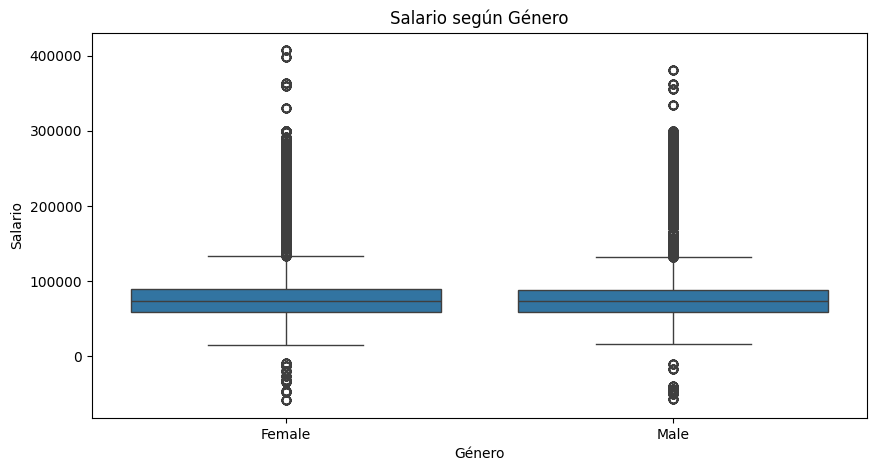

In [46]:
# Relaciones entre variables relevantes
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_alas, x='Education', y='Flights Booked')
plt.title("Vuelos Reservados según Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Vuelos Reservados")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_alas, x='Gender', y='Salary')
plt.title("Salario según Género")
plt.xlabel("Género")
plt.ylabel("Salario")
plt.show()

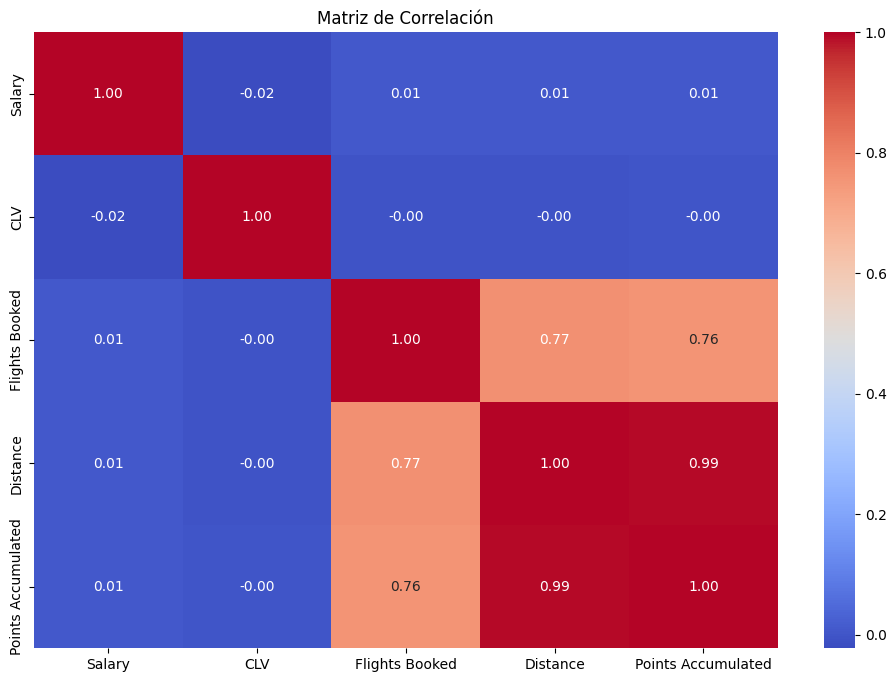

In [47]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation = df_alas[['Salary', 'CLV', 'Flights Booked', 'Distance', 'Points Accumulated']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

## Conclusiones
- Valores nulos en Salary: En la columna Salary hay bastantes valores nulos (aproximadamente el 25% de los datos). Esto puede ser relevante al analizar la relación entre género y salario, ya que los valores faltantes podrían influir en los resultados de cualquier prueba estadística.

- Distribución del salario: El salario tiene una amplia dispersión con valores extremos. El valor mínimo negativo es un dato atípico, lo cual puede indicar un error en los datos. Esto deberá limpiarse o ajustarse para evitar que distorsione el análisis.

- Distribución de Flights Booked: La mayoría de los clientes reservan pocos vuelos al mes, con una mediana de 1 y un 75% de datos por debajo de 8 vuelos. Esto sugiere que la mayoría de los clientes tienen un uso ocasional de la aerolínea.

- Diferencias según nivel educativo en Flights Booked: La visualización de Flights Booked según el nivel educativo puede mostrar patrones. Si encontramos que ciertos niveles educativos tienden a reservar más vuelos, podría ser útil para personalizar las campañas de marketing.

- Correlaciones entre variables numéricas: La matriz de correlación muestra cómo variables como Flights Booked, Distance, y Points Accumulated se relacionan entre sí.

In [48]:
# Calcular la media de salario
mean_salary = df_alas['Salary'].mean()
print(f"La media de salario es: {mean_salary:.2f}")

# Tamaño de la muestra y desviación estándar
sample_size = df_alas['Salary'].count()
std_dev = df_alas['Salary'].std()

# Calcular el error estándar de la media (SEM)
# SEM = Desviación estándar / Raíz cuadrada del tamaño de la muestra
sem = std_dev / (sample_size ** 0.5)
print(f"Error estándar de la media (SEM): {sem}")

# Calcular el coeficiente de variación (CV)
# CV = Desviación estándar / Media
cv = std_dev / mean_salary
print(f"Coeficiente de variación (CV): {cv}")

La media de salario es: 79268.83
Error estándar de la media (SEM): 63.574581611125666
Coeficiente de variación (CV): 0.4414362530027492


Para estudiar si la media es representativa utilizo el error estandar de la media, en este caso el valor es bajo, lo que indica que la media es una buena estimación de la población, ademas el coeficiente de variación (CV) es 0.44, un valor moderado; mientras más bajo sea el CV, menos variabilidad existe en relación con la media, lo cual indica mayor representatividad.

A vista de los datos sustituire los nullos por la media de la población.

In [ ]:
# Sustituir cualquier valor nulo por la media de Salary
global_mean_salary = df_alas['Salary'].mean()
df_alas['Salary'].fillna(global_mean_salary, inplace=True)

# Verificar que no queden nulos en la columna de Salary
print("Valores nulos en Salary después de la imputación:", df_alas['Salary'].isnull().sum())


Valores nulos en Salary después de la imputación: 0


## Ejercicio 2:
Determina si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

 Pasos a seguir:

   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones
   


In [58]:
# Obtener los diferentes niveles educativos
niveles_educativos = df_alas['Education'].unique()
vuelos_por_educacion = [df_alas[df_alas['Education'] == nivel]['Flights Booked'] for nivel in niveles_educativos]

# Paso 1: Prueba de normalidad (Shapiro-Wilk)
resultados_normalidad = {}
for nivel in niveles_educativos:
    estadistico, p_valor = shapiro(df_alas[df_alas['Education'] == nivel]['Flights Booked'])
    resultados_normalidad[nivel] = (estadistico, p_valor)

# Imprimir los resultados de normalidad
print("Resultados de la prueba de normalidad (Shapiro-Wilk):")
for nivel, resultado in resultados_normalidad.items():
    estadistico, p_valor = resultado
    if p_valor > 0.05:
        print(f"{nivel}: Datos normales (p = {p_valor})")
    else:
        print(f"{nivel}: Datos no normales (p = {p_valor})")

# Paso 2: Prueba de homogeneidad de varianzas (Levene)
estadistico_levene, p_valor_levene = levene(*vuelos_por_educacion)

print("\nPrueba de homogeneidad de varianzas (Levene):")
if p_valor_levene > 0.05:
    print(f"Varianzas homogéneas (p = {p_valor_levene})")
else:
    print(f"Varianzas no homogéneas (p = {p_valor_levene})")

Resultados de la prueba de normalidad (Shapiro-Wilk):
Bachelor: Datos no normales (p = 1.375823577174116e-155)
College: Datos no normales (p = 2.7548393568514772e-134)
Master: Datos no normales (p = 7.113469953039037e-82)
High School or Below: Datos no normales (p = 1.1534572228272506e-92)
Doctor: Datos no normales (p = 2.3042495093245808e-91)

Prueba de homogeneidad de varianzas (Levene):
Varianzas no homogéneas (p = 0.01290681079552744)


- Normalidad: Los resultados de la prueba de Shapiro-Wilk indican que los datos de cada nivel educativo no siguen una distribución normal (valores p = 0 en todos los casos).
- Homogeneidad de varianzas: La prueba de Levene da un valor p de 0.0129, lo cual sugiere que las varianzas no son homogéneas.

In [64]:
# Paso 3: Definición de la hipótesis
# H0: No hay diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.
# H1: Existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

# Paso 4: Realizar la prueba de Kruskal-Wallis
resultado_kruskal = kruskal(*vuelos_por_educacion)
p_value = resultado_kruskal.pvalue
print(f"Valor p: {p_value}")


Valor p: 0.0012393337284342227


Teniendo un valor p de 0.0012 y siendo este inferior a 0.005 se puede interpretar que existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

## Ejercicio 3:
Determina si existe una diferencia significativa en el salario de los clientes en función del género de los mismos.

Pasos a seguir:
   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones

In [67]:
# Obtener los diferentes generos
generos = df_alas['Gender'].unique()
salarios_por_genero = [df_alas[df_alas['Gender'] == genero]['Salary'] for genero in generos]

# Paso 1: Prueba de normalidad (Shapiro-Wilk)
resultados_normalidad = {}
for genero in generos:
    estadistico, p_valor = shapiro(df_alas[df_alas['Gender'] == nivel]['Salary'])
    resultados_normalidad[nivel] = (estadistico, p_valor)

# Imprimir los resultados de normalidad
print("Resultados de la prueba de normalidad (Shapiro-Wilk):")
for nivel, resultado in resultados_normalidad.items():
    estadistico, p_valor = resultado
    if p_valor > 0.05:
        print(f"{nivel}: Datos normales (p = {p_valor})")
    else:
        print(f"{nivel}: Datos no normales (p = {p_valor})")

# Paso 2: Prueba de homogeneidad de varianzas (Levene)
estadistico_levene, p_valor_levene = levene(*salarios_por_genero)

print("\nPrueba de homogeneidad de varianzas (Levene):")
if p_valor_levene > 0.05:
    print(f"Varianzas homogéneas (p = {p_valor_levene})")
else:
    print(f"Varianzas no homogéneas (p = {p_valor_levene})")

Resultados de la prueba de normalidad (Shapiro-Wilk):
Male: Datos no normales (p = 2.6486477452423454e-167)

Prueba de homogeneidad de varianzas (Levene):
Varianzas homogéneas (p = 0.3357654418448056)


- Normalidad: Los datos de salario para el género masculino no son normales (p ≈ 0), lo cual sugiere que no se cumple el supuesto de normalidad.
- Homogeneidad de varianzas: La prueba de Levene da un valor p de 0.3358, lo cual indica que las varianzas entre géneros son homogéneas, ya que el p-valor es mayor a 0.05.

Dado que el supuesto de normalidad no se cumple, lo adecuado es usar una prueba no paramétrica como la prueba de Mann-Whitney U para comparar dos grupos (en este caso, géneros) sin requerir normalidad.

In [ ]:
# Planteamiento de las hipótesis
# Hipótesis nula (H0): No existe una diferencia significativa en el salario de los clientes en función del género.
# Hipótesis alternativa (H1): Existe una diferencia significativa en el salario de los clientes en función del género.

# Separar los salarios por género
salario_hombres = df_alas[df_alas['Gender'] == 'Male']['Salary']
salario_mujeres = df_alas[df_alas['Gender'] == 'Female']['Salary']

# Realizar la prueba de Mann-Whitney U
resultado_mannwhitney = mannwhitneyu(salario_hombres, salario_mujeres, alternative='two-sided')

# Mostrar los resultados
print("Resultados de la prueba de Mann-Whitney U:")
print(f"Valor U: {resultado_mannwhitney.statistic}")
print(f"Valor p: {resultado_mannwhitney.pvalue:.5f}")

Resultados de la prueba de Mann-Whitney U:
Valor U: 20403143424.0
Valor p: 0.00001


Dado el valor p obtenido (0.00001) es significativamente menor a 0.05, podemos rechazar la hipótesis nula (H0). Esto indica que existe una diferencia significativa en el salario de los clientes en función del género.